In [2]:
import numpy as np
import matplotlib.pyplot as plt

from data import get_names

In [3]:
words = get_names()
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [4]:
characters = ['.', *sorted({c for w in words for c in w})]
print(characters)
print(len(characters))
index = {
    c:i
    for i, c in enumerate(characters)
}
index
print(index)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [5]:
# create the training set of all of the bigrams
# x is the input, y is the target (i.e. the next character)
x, y = [], []
training_data = []
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        x.append(index[c1])
        y.append(index[c2])

x = np.array(x)
y = np.array(y)

print(x[:10])
print(y[:10])

[ 0  5 13 13  1  0 15 12  9 22]
[ 5 13 13  1  0 15 12  9 22  9]


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


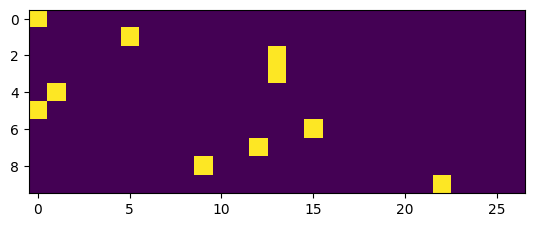

In [6]:
# encode
def one_hot_encode(index: int) -> np.array:
    """Return a one-hot encoded vector of the given index."""
    vector = np.zeros(len(characters))
    vector[index] = 1
    return vector

x_encoded = np.array([one_hot_encode(i) for i in x])
y_encoded = np.array([one_hot_encode(i) for i in y])

print(x_encoded[:6])
plt.imshow(x_encoded[0:10])

In [26]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    """A Multilayer Perceptron (MLP) model in PyTorch with one hidden layer."""

    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(27, 50)  # Hidden layer with 50 neurons
        self.output = nn.Linear(50, 27)  # Output layer with 27 outputs
        self.relu = nn.ReLU()            # ReLU activation for hidden layer
        self.softmax = nn.Softmax(dim=1) # Softmax activation for output layer

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        Args:
            x: Input tensor.

        Returns:
            Tensor after passing through the layers and activations.
        """
        x = self.relu(self.hidden(x))
        return self.softmax(self.output(x))

learning_rate = 0.01
epochs = 15
batch_size = 32

dataset = TensorDataset(
    torch.tensor(x_encoded, dtype=torch.float),
    torch.tensor(y_encoded, dtype=torch.float),
)
# not shuffling so that is more similar to numpy implementation
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
losses = []

for epoch in range(epochs):
    for i, (inputs, targets) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if i % 3125 == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}, batch {i:04}, loss {loss}")
print(f"Epoch {epoch}, batch {i:04}, loss {loss}")

Epoch 0, batch 0000, loss 3.2958106994628906
Epoch 0, batch 3125, loss 3.2895469665527344
Epoch 0, batch 6250, loss 3.287709951400757
Epoch 1, batch 0000, loss 3.281012535095215
Epoch 1, batch 3125, loss 3.2275071144104004
Epoch 1, batch 6250, loss 3.2146928310394287
Epoch 2, batch 0000, loss 3.165951728820801
Epoch 2, batch 3125, loss 3.0453169345855713
Epoch 2, batch 6250, loss 3.197606325149536
Epoch 3, batch 0000, loss 3.115030288696289
Epoch 3, batch 3125, loss 2.9976024627685547
Epoch 3, batch 6250, loss 3.1807398796081543
Epoch 4, batch 0000, loss 3.070197105407715
Epoch 4, batch 3125, loss 2.9854393005371094
Epoch 4, batch 6250, loss 3.172398805618286
Epoch 5, batch 0000, loss 3.0623788833618164
Epoch 5, batch 3125, loss 2.9848437309265137
Epoch 5, batch 6250, loss 3.1686697006225586
Epoch 6, batch 0000, loss 3.063253879547119
Epoch 6, batch 3125, loss 2.9864234924316406
Epoch 6, batch 6250, loss 3.1665947437286377
Epoch 7, batch 0000, loss 3.065898895263672
Epoch 7, batch 3125

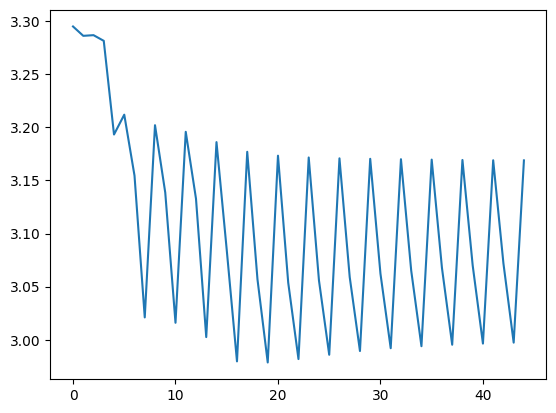

In [24]:
# plot losses over time
plt.plot(losses)